In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('bank-full.csv')
df.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Text(0.5, 1.0, 'Number Of Campaigns Based on Month')

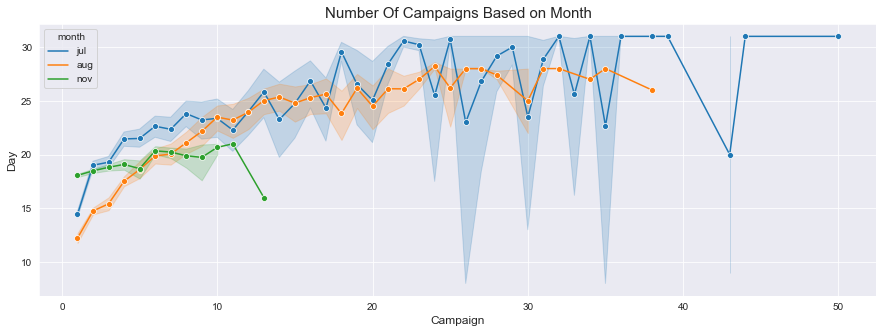

In [380]:
fig,ax = plt.subplots(figsize=(15,5))
#df_july = df[df['month']=='nov']
#df_july=df[df['month']=='nov'].groupby(['month','day']).sum()
df2 = df[['campaign','day','month']]
df3 = (df2[df2['month'].isin(['aug','nov','jul'])])
q = sns.lineplot(data=df3,x='campaign',y='day',hue='month',marker="o")
q.set_xlabel("Campaign", fontsize = 12)
q.set_ylabel("Day", fontsize = 12)
q.set_title("Number Of Campaigns Based on Month", fontsize = 15)

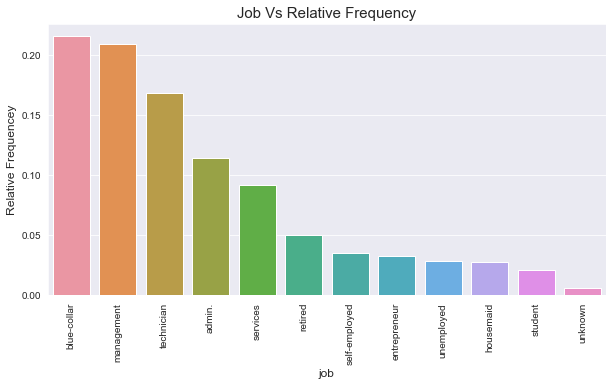

In [377]:
fig,ax = plt.subplots(figsize=(10,5))
a2= (df.groupby(by='job').size()/df.groupby(by='job').size().sum()).sort_values(ascending=False)
#print(a2)
df1=pd.DataFrame(a2)
df1=df1.reset_index()
df1.columns = ['job','percent']
df1.dtypes
#ax.plot(df1)
sns.set_style('darkgrid')
q1= sns.barplot(x=df1.job, y=df1.percent, ax=ax)
sns.set_style('darkgrid')
q1.set_xlabel("job", fontsize = 12)
ax.tick_params(axis='x', rotation=90)
q1.set_ylabel("Relative Frequencey", fontsize = 12)
q1.set_title("Job Vs Relative Frequency", fontsize = 15)
plt.savefig('plot2.png', bbox_inches='tight')

Text(0.5, 1.0, 'Correlation Matrix on Bank Dataset')

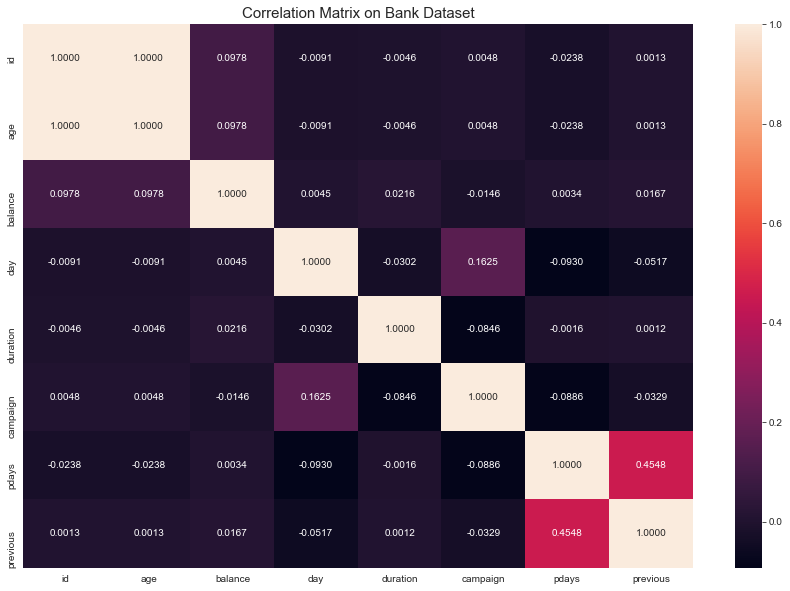

In [180]:
fig,ax3 = plt.subplots(figsize=(15,10))
#sns.set_style('darkgrid')
df1 = df.iloc[:,1:]
q2= sns.heatmap(df.corr(), ax=ax3, annot=True,fmt='.4f')
#sns.set_style('darkgrid')
#q1.set_xlabel("job", fontsize = 12)
#ax.tick_params(axis='x', rotation=90)
#q1.set_ylabel("Relative Frequencey", fontsize = 12)
q2.set_title("Correlation Matrix on Bank Dataset", fontsize = 15)
#plt.savefig('plot2.png', bbox_inches='tight')

Text(0.5, 1.0, 'Campaign Vs Duration  - Month Wise')

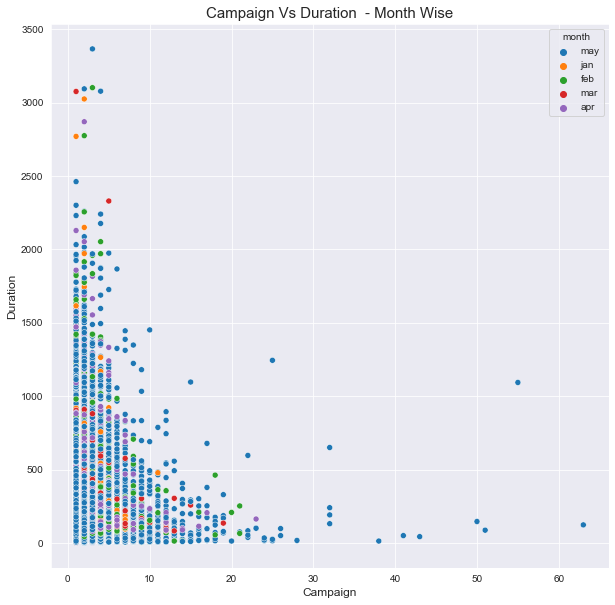

In [190]:
fig,ax4 = plt.subplots(figsize=(10,10))
df2 = df[['campaign','duration','month']]
df3 = (df2[df2['month'].isin(['jan','feb','mar','apr','may'])])
#a = ('jan','feb','mar','apr','may')
q3 = sns.scatterplot(data= df3,x='campaign',y='duration', hue='month', ax=ax4)
q3.set_xlabel("Campaign", fontsize = 12)
q3.set_ylabel("Duration", fontsize = 12)
q3.set_title("Campaign Vs Duration  - Month Wise", fontsize = 15)

Text(0.5, 1.0, 'Balance vs Age with respect to client subscription')

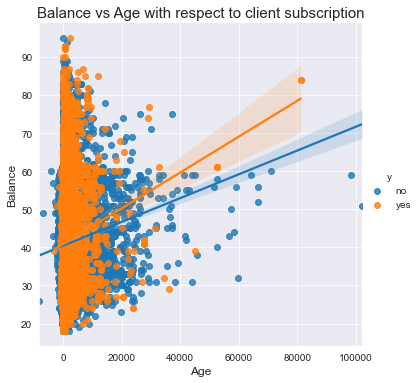

In [198]:
#fig,ax4 = plt.subplots(figsize=(10,10))

q4 = sns.lmplot(x="balance", y="age", hue="y", data=df)
q4.set_axis_labels("Age","Balance", fontsize = 12)
ax = plt.gca()
ax.set_title("Balance vs Age with respect to client subscription", fontsize = 15)

Text(0.5, 1.0, 'Default vs Age Box Plot')

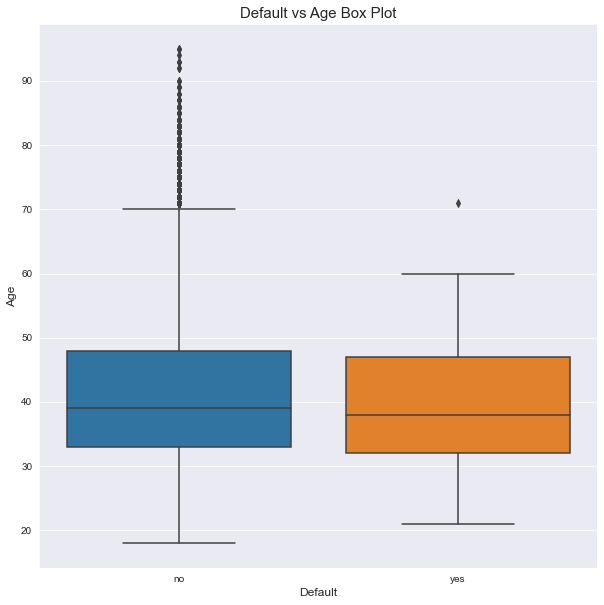

In [201]:
fig,ax5 = plt.subplots(figsize=(10,10))
q5 = sns.boxplot(x=df["default"], y=df.age, ax=ax5)
q5.set_xlabel("Default", fontsize = 12)
q5.set_ylabel("Age", fontsize = 12)
q5.set_title("Default vs Age Box Plot", fontsize = 15)

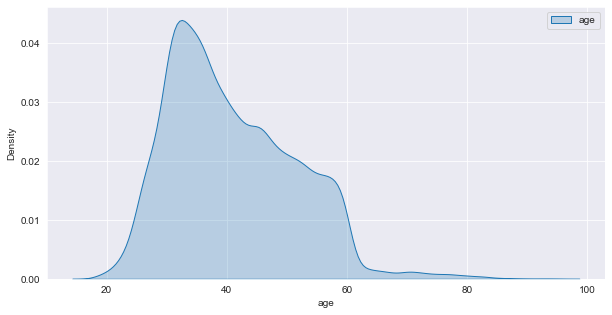

In [246]:
fig,ax6 = plt.subplots(figsize=(10,5))
df_dns = df[df['month']=='jul']
#print(df_dns)
q6 = sns.kdeplot(x=df["age"], shade=True, label='age')
q5.set_xlabel("Default", fontsize = 12)
#q5.set_ylabel("Age", fontsize = 12)
#q5.set_title("Default vs Age Box Plot", fontsize = 15)
plt.legend()

Text(0.5, 1.0, 'Number of Campaigns In The July Month')

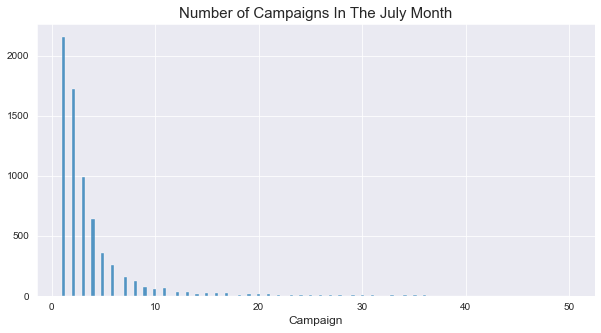

In [245]:
fig,ax6 = plt.subplots(figsize=(10,5))
df_fre = df[df.month=='jul']
q7 = sns.histplot(x=df_fre['campaign'])
q7.set_xlabel("Campaign", fontsize = 12)
q7.set_ylabel("", fontsize = 12)
q7.set_title("Number of Campaigns In The July Month", fontsize = 15)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


Text(0.5, 1.0, 'Last Contact Duration - Job Wise')

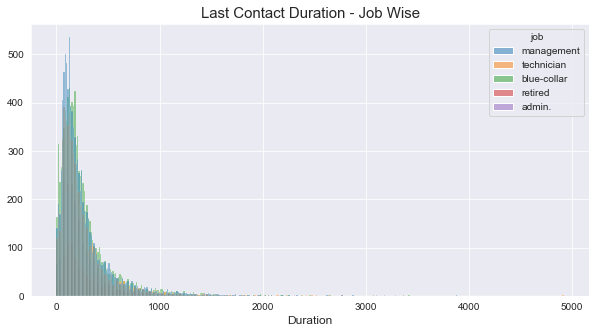

In [254]:
fig,ax7 = plt.subplots(figsize=(10,5))
print(df.job.unique())
df_job = df[df.job.isin(['blue-collar','retired','technician','admin.','management'])]
df_job.job.unique()
q8 = sns.histplot(x=df_job['duration'],hue=df_job.job)
q8.set_xlabel("Duration", fontsize = 12)
q8.set_ylabel("", fontsize = 12)
q8.set_title("Last Contact Duration - Job Wise", fontsize = 15)

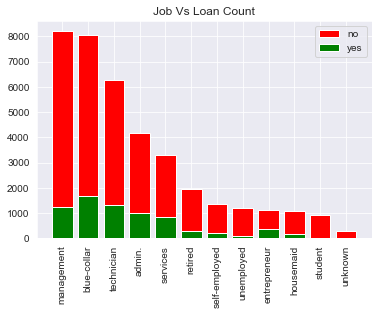

In [383]:
fig, ax = plt.subplots()
df1=df[['job','loan']]
#print(df1)
df2 =pd.DataFrame(df1.value_counts()).reset_index()

df2.columns=['job','loan','count']
df3=df2[df2['loan']=='no']
df4=df2[df2['loan']=='yes']
#df3 = df3.drop(columns=['loan'])
#q10 = sns.barplot(df2.job,df2['count'], hue = df2.loan)

#df3.T.plot.bar(stacked=True,x=df3.job, y=df3['count'])

ax.bar(df3.job,df3['count'], label='no',color='red')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(df4.job,df4['count'],
       label='yes',color='green')
ax.set_title('Job Vs Loan Count')
ax.tick_params(axis='x', rotation=90)

ax.legend()
